liberaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from scipy.sparse import hstack
import math
import scipy as sc
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as m

In [69]:
df=pd.read_csv("C:\\Users\\sahil\\Desktop\\Knight ML Assignment\\Knight ML Assignment\\Data\\train.csv")

In [70]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [71]:
df.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

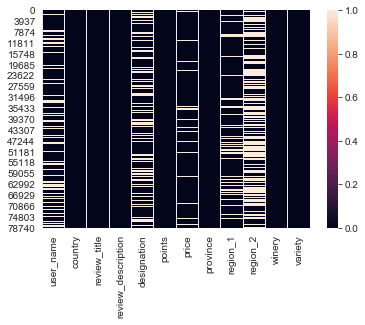

In [72]:
sns.heatmap(df.isnull())

its looks like the user_name,designation,price,region_1, region_2 have null values


droping username as it does help in pridection of variety

In [73]:
df.drop('user_name',axis=1,inplace=True)

In [74]:
df.head(2)

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend


In [75]:
df.groupby('variety')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
variety,,,,,,,,
Bordeaux-style Red Blend,4238.0,47.988674,100.914714,7.0,19.0,30.0,50.00,3300.0
Bordeaux-style White Blend,551.0,34.422868,89.475507,6.0,13.0,17.0,28.00,1000.0
Cabernet Franc,1055.0,34.932701,21.524537,10.0,22.0,30.0,40.00,180.0
Cabernet Sauvignon,7485.0,47.841416,41.237308,4.0,20.0,37.0,65.00,625.0
Champagne Blend,973.0,71.593011,60.777869,7.0,41.0,55.0,80.00,600.0
Chardonnay,8859.0,34.718591,44.294754,4.0,18.0,27.0,40.00,2013.0
Gamay,665.0,20.762406,11.685027,9.0,15.0,20.0,24.00,224.0
Gewürztraminer,791.0,25.847029,15.037274,6.0,17.0,22.0,30.00,120.0
Grüner Veltliner,896.0,28.251116,38.912687,10.0,17.0,23.0,31.25,1100.0


it looks like points and price won't be effecting or help us more in prediction

In [76]:
df.drop(['points','price'],axis=1,inplace=True)

In [77]:
df.head(2)

,country,review_title,review_description,designation,province,region_1,region_2,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend


region 1 and region 2 are related to province or dependent to province and it there for its an depandent frature 

In [78]:
df.drop(['region_1','region_2'],axis=1,inplace=True)

In [79]:
df.head(2)

,country,review_title,review_description,designation,province,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,Australia Other,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,Washington,North by Northwest,Red Blend


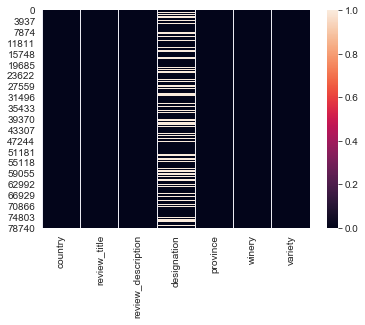

In [80]:
sns.heatmap(df.isnull())

droping destignation and country

In [81]:
df.drop(['country','designation'],axis=1,inplace=True)

In [82]:
df

,review_title,review_description,province,winery,variety
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Australia Other,Andrew Peace,Chardonnay
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,Washington,North by Northwest,Red Blend
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Piedmont,Renato Ratti,Nebbiolo
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",France Other,Château du Cèdre,Malbec
...,...,...,...,...,...
82652,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Northern Spain,Montecillo,Tempranillo
82653,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",New Mexico,Vivác Winery,Cabernet Sauvignon
82654,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Beaujolais,Domaine de la Madone,Gamay
82655,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ...",Bordeaux,Château Beaumont,Bordeaux-style Red Blend


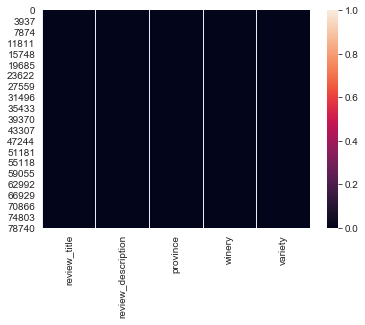

In [83]:
sns.heatmap(df.isnull())

looks like our data is clean 

In [84]:
#but for surity
df.dropna(inplace=True)

# train test split

In [85]:
X=df.drop('variety',axis=1)
y=df.variety

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

using Count vectorizer and Tfidf

In [86]:
cvr=CountVectorizer()
tfr=TfidfTransformer()

cvd=CountVectorizer()
tfd=TfidfTransformer()

cvp=CountVectorizer()
tfp=TfidfTransformer()

cvw=CountVectorizer()
tfw=TfidfTransformer()

In [87]:
X_train1=X_train.review_title
X_train2=X_train.review_description
X_train3=X_train.province
X_train4=X_train.winery

X_test1=X_test.review_title
X_test2=X_test.review_description
X_test3=X_test.province
X_test4=X_test.winery

In [88]:
ai=cvr.fit(X_train1).transform(X_train1)

a=tfr.fit(ai).transform(ai)

bi=cvd.fit(X_train2).transform(X_train2)

b=tfd.fit(bi).transform(bi)

ci=cvp.fit(X_train3).transform(X_train3)

c=tfp.fit(ci).transform(ci)

di=cvw.fit(X_train4).transform(X_train4)

d=tfw.fit(di).transform(di)

In [89]:
#shape of our sparse matrix for each alphabatical column

a.shape,b.shape,c.shape,d.shape


((55356, 23406), (55356, 22498), (55356, 376), (55356, 11943))

In [90]:
#join it
p=hstack((a,b,c,d))
p.shape

(55356, 58223)

similear for test data

In [91]:
#only transform
ei=cvr.transform(X_test1)

e=tfr.transform(ei)

fi=cvd.transform(X_test2)

f=tfd.transform(fi)

gi=cvp.transform(X_test3)

g=tfp.transform(gi)

hi=cvw.transform(X_test4)

h=tfw.transform(hi)

In [92]:
e.shape,f.shape,g.shape,h.shape

((27266, 23406), (27266, 22498), (27266, 376), (27266, 11943))

In [93]:
q=hstack((e,f,g,h))

In [94]:
q.shape

(27266, 58223)

# model

In [95]:
#using Random forest classifer as it will give best pridection
ml=RandomForestClassifier(n_estimators=50).fit(p,y_train)
#withn_estimators 20 the pridection is 90% accurate
#withn_estimators 30 the pridection is 94% accurate
#withn_estimators 50 the pridection is 95% accurate
#50 is best

In [96]:
pre=ml.predict(q)
print(classification_report(y_test,pre))
print('\n')

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.88      0.82      0.85      1831
Bordeaux-style White Blend       0.94      0.59      0.72       283
            Cabernet Franc       0.98      0.75      0.85       376
        Cabernet Sauvignon       0.96      1.00      0.98      2480
           Champagne Blend       0.97      0.91      0.94       392
                Chardonnay       0.95      0.99      0.97      3139
                     Gamay       0.96      0.96      0.96       270
            Gewürztraminer       1.00      0.85      0.92       275
          Grüner Veltliner       1.00      0.99      1.00       367
                    Malbec       0.97      0.98      0.97       680
                    Merlot       0.99      0.95      0.97       819
                  Nebbiolo       0.97      0.99      0.98       766
              Pinot Grigio       1.00      0.98      0.99       257
                Pinot Gris       1.00      0.97

as the model is prediction 95% accuracy on training data set we can apply the same on test data set

# test data set and pridiction

In [97]:
#first have to prepare data set by cleaning

In [98]:
df_test=pd.read_csv("C:\\Users\\sahil\\Desktop\\Knight ML Assignment\\Knight ML Assignment\\Data\\test.csv")

In [99]:
df_test.drop(['user_name','designation', 'points', 'price','region_1', 'region_2','country'],axis=1,inplace=True)

In [100]:
df_test.dropna(inplace=True)

In [101]:
df_test

,review_title,review_description,province,winery
0,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Oregon,Boedecker Cellars
1,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Mendoza Province,Mendoza Vineyards
2,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",California,Prime
3,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Mendoza Province,Bodega Cuarto Dominio
4,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",Tuscany,SassodiSole
...,...,...,...,...
20660,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",California,Yorkville Cellars
20661,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Languedoc-Roussillon,Château Ribaute
20662,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",California,Daou
20663,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Northern Spain,Peñascal


now text word to Tfidf form

In [102]:
cvrt=CountVectorizer()
tfrt=TfidfTransformer()

cvdt=CountVectorizer()
tfdt=TfidfTransformer()

cvpt=CountVectorizer()
tfpt=TfidfTransformer()

cvwt=CountVectorizer()
tfwt=TfidfTransformer()

In [103]:
X_train1t=df.review_title
X_train2t=df.review_description
X_train3t=df.province
X_train4t=df.winery
y_traint=df.variety

X_test1t=df_test.review_title
X_test2t=df_test.review_description
X_test3t=df_test.province
X_test4t=df_test.winery

In [104]:
#training data
ai=cvrt.fit(X_train1t).transform(X_train1t)

a=tfrt.fit(ai).transform(ai)

bi=cvdt.fit(X_train2t).transform(X_train2t)

b=tfdt.fit(bi).transform(bi)

ci=cvpt.fit(X_train3t).transform(X_train3t)

c=tfpt.fit(ci).transform(ci)

di=cvwt.fit(X_train4t).transform(X_train4t)

d=tfwt.fit(di).transform(di)

In [105]:
a.shape,b.shape,c.shape,d.shape

((82622, 26813), (82622, 26002), (82622, 402), (82622, 13239))

In [112]:
X_traint=hstack((a,b,c,d))

In [113]:
X_traint.shape

(82622, 66456)

In [115]:
len(y_traint)

82622

In [106]:
#test data
ei=cvrt.transform(X_test1t)

e=tfrt.transform(ei)

fi=cvdt.transform(X_test2t)

f=tfdt.transform(fi)

gi=cvpt.transform(X_test3t)

g=tfpt.transform(gi)

hi=cvwt.transform(X_test4t)

h=tfwt.transform(hi)

In [107]:
e.shape,f.shape,g.shape,h.shape

((20661, 26813), (20661, 26002), (20661, 402), (20661, 13239))

In [116]:
X_testt=hstack((e,f,g,h))

In [118]:
X_testt.shape

(20661, 66456)

# prediction

In [119]:
#using Randomforest with n_estimator =50

In [121]:
ml=RandomForestClassifier(n_estimators=50).fit(X_traint,y_traint)

In [123]:
pre=ml.predict(X_testt)

In [124]:
pre

array(['Pinot Noir', 'Malbec', 'Chardonnay', ..., 'Cabernet Sauvignon',
       'Tempranillo', 'Cabernet Sauvignon'], dtype=object)

In [126]:
#joint ti with data frome
df_test['variety']=pre

In [127]:
df_test

,review_title,review_description,province,winery,variety
0,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Oregon,Boedecker Cellars,Pinot Noir
1,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Mendoza Province,Mendoza Vineyards,Malbec
2,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",California,Prime,Chardonnay
3,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Mendoza Province,Bodega Cuarto Dominio,Malbec
4,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",Tuscany,SassodiSole,Sangiovese
...,...,...,...,...,...
20660,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",California,Yorkville Cellars,Cabernet Franc
20661,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Languedoc-Roussillon,Château Ribaute,Rosé
20662,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",California,Daou,Cabernet Sauvignon
20663,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Northern Spain,Peñascal,Tempranillo


In [129]:
df_test.to_csv('pridiction1.csv',index=False)

In [188]:
df2=pd.read_csv("C:\\Users\\sahil\\Desktop\\Knight ML Assignment\\Knight ML Assignment\\Data\\test.csv")

In [190]:
df2

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,#NAME?,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,#NAME?,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,#NAME?,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,#NAME?,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole
...,...,...,...,...,...,...,...,...,...,...,...
20660,#NAME?,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars
20661,#NAME?,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute
20662,#NAME?,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou
20663,#NAME?,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal


In [191]:
df2.dropna(subset=['province'],inplace=True)

In [192]:
df2

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,#NAME?,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,#NAME?,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,#NAME?,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,#NAME?,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole
...,...,...,...,...,...,...,...,...,...,...,...
20660,#NAME?,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars
20661,#NAME?,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute
20662,#NAME?,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou
20663,#NAME?,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal


In [193]:
df2['variety']=pre

In [194]:
#df2.to_csv('df2.csv')
df2

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,#NAME?,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Malbec
2,#NAME?,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,#NAME?,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Malbec
4,#NAME?,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese
...,...,...,...,...,...,...,...,...,...,...,...,...
20660,#NAME?,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,Cabernet Franc
20661,#NAME?,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute,Rosé
20662,#NAME?,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou,Cabernet Sauvignon
20663,#NAME?,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal,Tempranillo


_______________________________________________________________________________________________________________________________